In [2]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime


In [3]:
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
file_path = os.path.dirname('__file__')

In [5]:
raw_data = pd.read_csv(os.path.join(file_path, os.pardir, 'data/raw/Dataset.csv'))
raw_data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [6]:
# Droping the first columns wich is a replic of the index
raw_data = raw_data.iloc[:,1:]
raw_data.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [7]:
# Exploring the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mileage_per_year  10000 non-null  int64  
 1   model_year        10000 non-null  int64  
 2   price             10000 non-null  float64
 3   sold              10000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [8]:
raw_data.describe()

,mileage_per_year,model_year,price
count,10000.000000,10000.00000,10000.000000
mean,14183.391200,2004.14420,64842.373698
std,5008.571422,4.68758,25250.592393
min,363.000000,1998.00000,-840.360000
25%,10474.750000,2000.00000,44796.375000
50%,13418.500000,2003.00000,65225.685000
75%,17176.750000,2007.00000,85111.237500
max,39572.000000,2017.00000,118929.720000


In [9]:
raw_data[raw_data['price'] < 0]

,mileage_per_year,model_year,price,sold
4200,17000,1998,-270.77,yes
4796,13277,1998,-840.36,yes


In [10]:
# Creating a new raw_data removing the negative price values
raw_data = raw_data[raw_data['price'] > 0]

In [11]:
# Adding new column for the car age
raw_data.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [12]:
current_year = datetime.today().year
current_year

2024

In [13]:
raw_data['car_age'] = current_year - raw_data['model_year']
raw_data.head()

,mileage_per_year,model_year,price,sold,car_age
0,21801,2000,30941.02,yes,24
1,7843,1998,40557.96,yes,26
2,7109,2006,89627.50,no,18
3,26823,2015,95276.14,no,9
4,7935,2014,117384.68,yes,10


<h2>Visualization Analysis</h2>

In [14]:
from packages.statistics_func import plot_chart

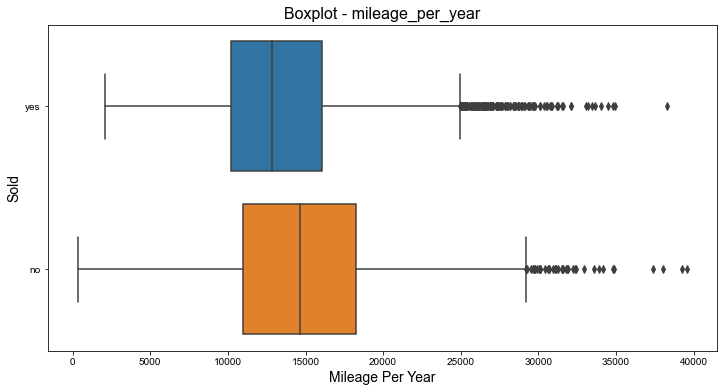

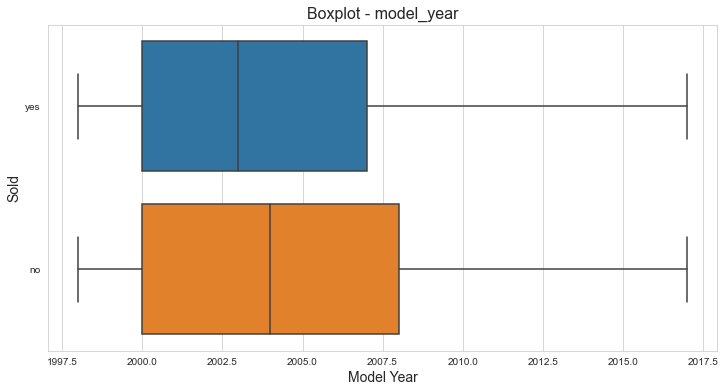

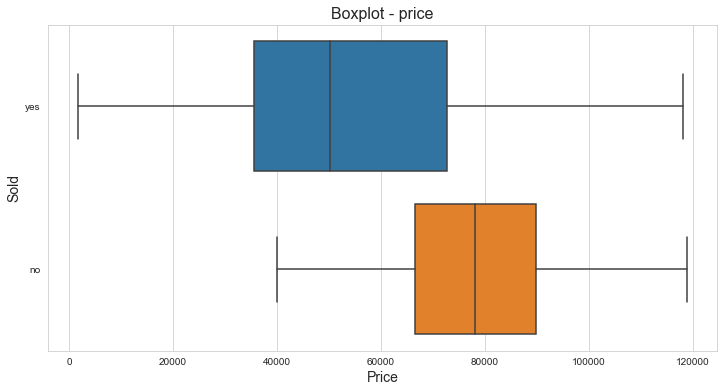

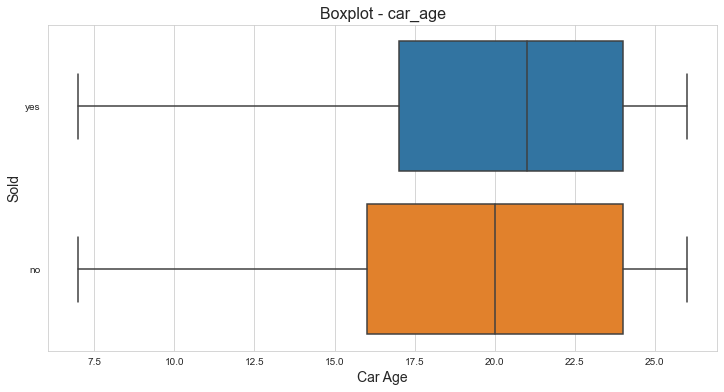

In [15]:
for column in raw_data.columns:
    if column != 'sold':
        plot_chart(chart_type = 'boxplot', x_var = column, y_var = 'sold', data_src = raw_data, title = column)

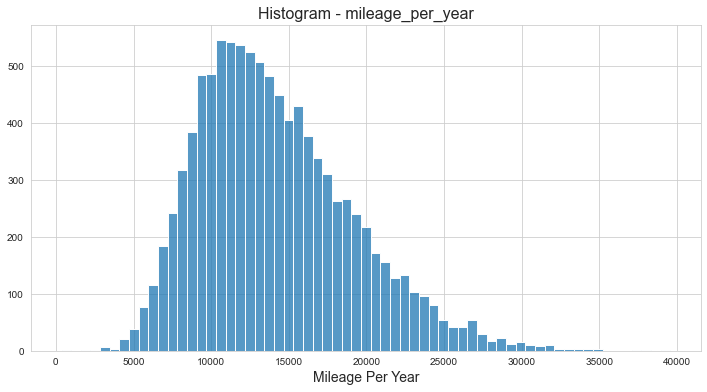

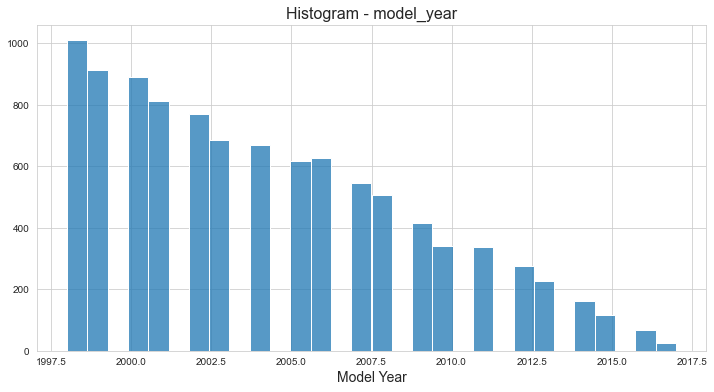

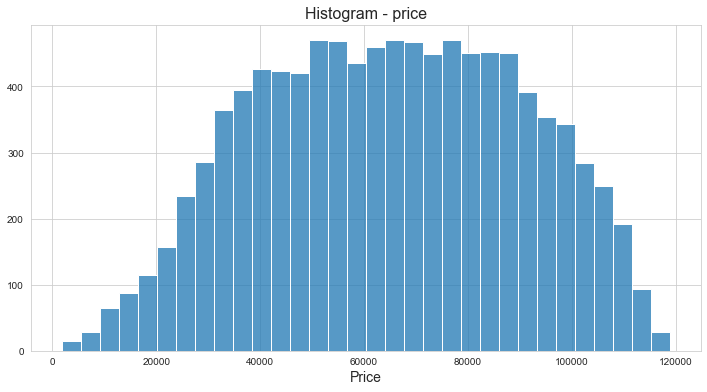

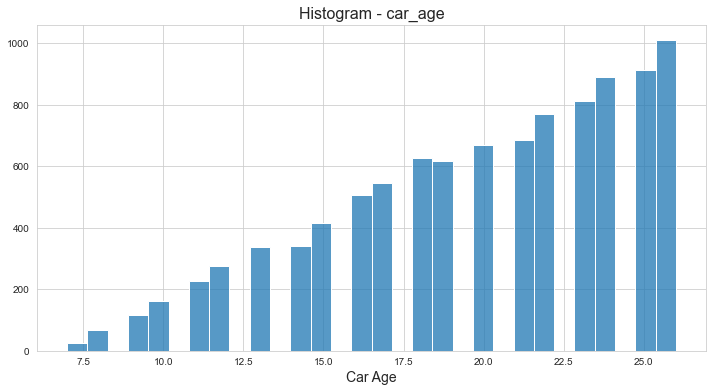

In [16]:
for column in raw_data.columns:
    if column != 'sold':
        plot_chart(chart_type = 'histogram', x_var = column, data_src = raw_data, title = column)

<h2>Target Variable Analysis</h2>

In [17]:
# Creating a frequency table of the target variable
freq_table = pd.DataFrame({'Quantity':(raw_data['sold'].value_counts()), 'Frequency (%)':(raw_data['sold'].value_counts(normalize=True)*100).round(2)})
freq_table

,Quantity,Frequency (%)
yes,5798,57.99
no,4200,42.01


In [18]:
# Creating a new csv file with the cleaned data
#raw_data.to_csv(f'{os.path.join(file_path, os.pardir, "data/interim/")}interim.csv', index=False)
